In [2]:
##Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)

2.15.0
2.15.0


In [27]:
##Q2. Load the Wine Quality dataset and explore its dimensions.
import pandas as pd

# Load the dataset (replace 'path_to_wine_quality_dataset.csv' with the actual path or URL)
dataset_url = 'wine1.csv'
wine_data = pd.read_csv(dataset_url)

# Explore the dimensions of the dataset
print(f"Dataset dimensions: {wine_data.shape}")


Dataset dimensions: (1599, 12)


In [28]:
##Q3. Check for null values, identify categorical variables, and encode them.
# Check for null values
null_values = wine_data.isnull().sum()
print(f"Null values in each column:\n{null_values}")

# Identify categorical variables (if any)
categorical_cols = wine_data.select_dtypes(include=['object']).columns
print(f"Categorical columns: {categorical_cols}")

# Encode categorical variables if they exist
if len(categorical_cols) > 0:
    wine_data = pd.get_dummies(wine_data, columns=categorical_cols, drop_first=True)



Null values in each column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Categorical columns: Index(['quality'], dtype='object')


In [50]:
##Q4. Separate the features and target variables from the dataset.
X = wine_data.drop(columns=['density'])
y = wine_data['density']

print("Features shape:", X.shape)
print("Target shape:", y.shape)



Features shape: (1599, 11)
Target shape: (1599,)


In [51]:
##Q5. Perform a train-test split, dividing the data into training, validation, and test datasets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (1279, 11) (1279,)
Validation set shape: (160, 11) (160,)
Test set shape: (160, 11) (160,)


In [52]:
##Q6 Scale the dataset using an appropriate scaling techniqu
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [53]:
##7Q7. Design and implement at least two hidden layers and an output layer for the binary categorical variables.
from keras.layers import Dense

hidden_layer1 = Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],))
hidden_layer2 = Dense(32, activation='relu')
output_layer = Dense(1, activation='sigmoid')

In [54]:
##Q8. Create a Sequential model in Keras and add the previously designed layers to it.
model = keras.Sequential([
    hidden_layer1,
    hidden_layer2,
    output_layer
])

In [55]:
##Q9
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                768       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
##10Q10. Set the loss function ('binary_crossentropy'), optimizer, and include the accuracy metric in the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
##Q12. Fit the model to the training data using appropriate batch size and number of epochs
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_val_scaled, y_val))

Epoch 1/10
40/40 [==============================] - 1s 7ms/step - loss: 0.3669 - accuracy: 0.0055 - val_loss: 0.1392 - val_accuracy: 0.0125
Epoch 2/10
40/40 [==============================] - 0s 3ms/step - loss: 0.0733 - accuracy: 0.0055 - val_loss: 0.0406 - val_accuracy: 0.0125
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 0.0330 - accuracy: 0.0055 - val_loss: 0.0283 - val_accuracy: 0.0125
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.0055 - val_loss: 0.0254 - val_accuracy: 0.0125
Epoch 5/10
40/40 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.0055 - val_loss: 0.0244 - val_accuracy: 0.0125
Epoch 6/10
40/40 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.0055 - val_loss: 0.0240 - val_accuracy: 0.0125
Epoch 7/10
40/40 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.0055 - val_loss: 0.0237 - val_accuracy: 0.0125
Epoch 8/10
40/40 [==

In [58]:
##Q13. Obtain the model's parameters (weights and biases).
weights = model.get_weights()
print("Model weights:", weights)

Model weights: [array([[ 2.48677060e-01,  2.31357768e-01, -1.41723454e-02,
         2.13099830e-02, -2.80073673e-01,  1.20977193e-01,
         1.30340844e-01,  1.28665805e-01,  1.46683857e-01,
        -5.78035079e-02,  2.10727513e-01,  2.77357072e-01,
         1.34900212e-01,  2.07477763e-01, -3.38620767e-02,
         2.46084109e-01, -9.90081504e-02,  1.74689844e-01,
        -2.90597081e-01,  2.18150660e-01,  9.92720947e-02,
         1.00027723e-02,  7.03458861e-02,  1.80218756e-01,
         2.95802146e-01, -1.83887020e-01, -2.51112074e-01,
         9.45774838e-02, -1.51893809e-01,  2.30198666e-01,
         2.10278228e-01,  2.62904793e-01,  3.93426605e-02,
        -3.83874178e-02,  2.06937179e-01,  1.76763535e-01,
         4.97037880e-02, -1.03619754e-01,  6.69368058e-02,
         2.52450824e-01, -2.89247222e-02, -1.05378009e-01,
         2.04751007e-02, -2.82710403e-01,  6.67230971e-03,
         2.11524721e-02, -5.73057421e-02,  2.62542695e-01,
        -1.17065199e-01,  1.14122331e-01

In [59]:
##Q14. Store the model's training history as a Pandas DataFrame
import pandas as pd

history_df = pd.DataFrame(history.history)
print("Training history:", history_df.head())

Training history:        loss  accuracy  val_loss  val_accuracy
0  0.366856  0.005473  0.139169        0.0125
1  0.073327  0.005473  0.040564        0.0125
2  0.033001  0.005473  0.028276        0.0125
3  0.026910  0.005473  0.025426        0.0125
4  0.025233  0.005473  0.024448        0.0125


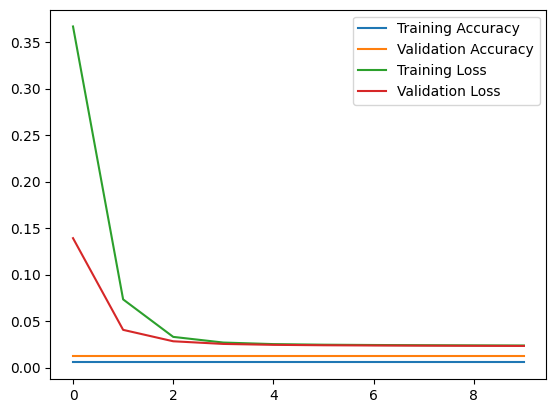

In [60]:
##Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.
import matplotlib.pyplot as plt

plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

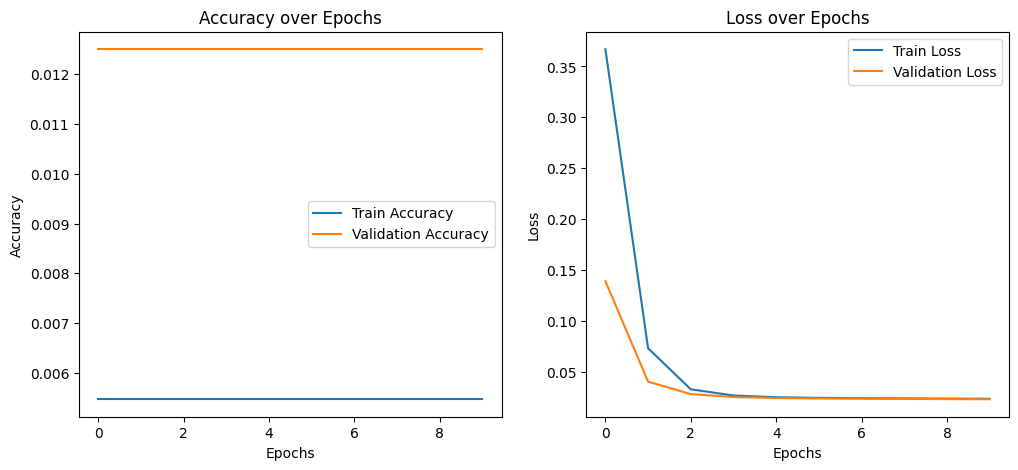

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], label='Train Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], label='Train Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()


In [62]:
##Q16. Evaluate the model's performance using the test dataset and report relevant metrics.
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print("Test accuracy:", test_acc)
print("Test loss:", test_loss)

5/5 [==============================] - 0s 5ms/step - loss: 0.0253 - accuracy: 0.0063
Test accuracy: 0.0062500000931322575
Test loss: 0.025316959246993065
